In [4]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np

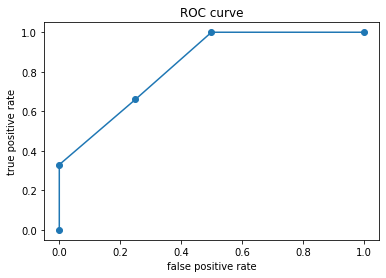

In [5]:
plt.plot([0, 0, 0.25, 0.5, 1], [0, 0.33, 0.66, 1, 1], "-o")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.savefig('roc_curve.pdf')
plt.show()

In [6]:
d2 = pd.read_csv(Path('data/D2z.txt'), delimiter=' ', names=['x1', 'x2', 'y'])
d2

,x1,x2,y
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0
...,...,...,...
195,-0.697750,1.098280,1
196,1.161160,-0.733751,0
197,-1.288480,0.443773,1
198,-1.384200,0.526523,1


In [15]:
x1_0 = d2['x1'].loc[d2['y']==0]
x2_0 = d2['x2'].loc[d2['y']==0]
x1_1 = d2['x1'].loc[d2['y']==1]
x2_1 = d2['x2'].loc[d2['y']==1]

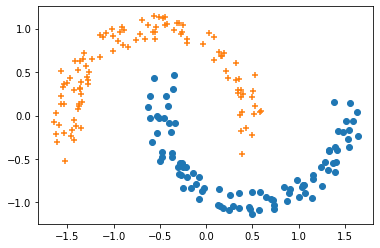

In [16]:
plt.scatter(x1_0, x2_0, marker="o")
plt.scatter(x1_1, x2_1, marker="+")

In [71]:
grid = np.arange(-2,2,0.1)
knn=[]
for i in grid:
    for j in grid:
        distances = []
        for k in range(len(d2)):
            dist = np.sqrt((i - d2.iloc[k,0])**2 + (j - d2.iloc[k,1])**2)
            distances.append(dist)
        knn.append([i, j, d2.iloc[np.argmin(distances), 0], d2.iloc[np.argmin(distances),1], d2.iloc[np.argmin(distances),2]])      
        

In [51]:
knn_df = pd.DataFrame(knn, columns=['grid_x', 'grid_y', 'nearest_neighbor_x', 'nearest_neighbor_y', 'label'])
knn_df

,grid_x,grid_y,nearest_neighbor_x,nearest_neighbor_y,label
0,-2.0,-2.0,-1.52392,-0.519564,1
1,-2.0,-1.9,-1.52392,-0.519564,1
2,-2.0,-1.8,-1.52392,-0.519564,1
3,-2.0,-1.7,-1.52392,-0.519564,1
4,-2.0,-1.6,-1.52392,-0.519564,1
...,...,...,...,...,...
1595,1.9,1.5,1.55225,0.140849,0
1596,1.9,1.6,1.55225,0.140849,0
1597,1.9,1.7,1.55225,0.140849,0
1598,1.9,1.8,1.55225,0.140849,0


Text(0.5, 1.0, '1-NN')

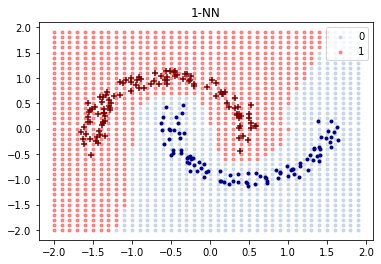

In [73]:
plt.scatter(knn_df.loc[knn_df['label']==0].iloc[:,0], knn_df.loc[knn_df['label']==0].iloc[:,1], marker=".", color = 'lightsteelblue', alpha=0.6, label = '0')
plt.scatter(knn_df.loc[knn_df['label']==1].iloc[:,0], knn_df.loc[knn_df['label']==1].iloc[:,1], marker=".", color = 'red', alpha=0.4, label = '1')
plt.scatter(x1_0, x2_0, marker=".", color = 'darkblue')
plt.scatter(x1_1, x2_1, marker="+", color ='maroon')
plt.legend()
plt.savefig('1nn.pdf')
plt.title('1-NN')

In [7]:
emails = pd.read_csv(Path('data/emails.csv'), index_col='Email No.')
emails

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 4996,20,6,3,1,1,1,34,0,0,15,...,0,0,0,0,0,0,0,1,0,0
Email 4997,0,7,1,0,0,0,20,1,1,0,...,0,0,0,1,0,0,0,0,0,0
Email 4998,6,8,1,3,2,1,64,7,1,16,...,0,0,0,0,0,0,0,0,0,0


We use the following train/test splits for cross-fold validation.

In [23]:
# fold 1
test = emails[:1000]
train = emails[1000:]

# fold 2
test_2 = emails[1000:2000]
train_2 = emails.iloc[np.r_[:1000, 2000:5000]]

# fold 3
test_3 = emails[2000:3000]
train_3 = emails.iloc[np.r_[:2000, 3000:5000]]

# fold 4
test_4 = emails[3000:4000]
train_4 = emails.iloc[np.r_[:3000, 4000:5000]]

# fold 5
test_5 = emails[4000:]
train_5 = emails[:4000]


In [105]:
test_preds = []
for i in range(len(test)):
    distances = []
    for j in range(len(train)):
        dist = np.sqrt(np.sum((test.iloc[i,:] - train.iloc[j,:])**2))
        distances.append(dist)
    test_preds.append(train.iloc[np.argmin(distances), -1])
test_preds      

[0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [123]:
accuracy = []
false_pos = []
true_pos = []
false_neg = []
for i in range(len(test['Prediction'])):
    if test_preds[i] == test['Prediction'].iloc[i]:
        accuracy.append(i)
    if test_preds[i] == 1 and test['Prediction'].iloc[i] == 1:
        true_pos.append(i)
    if test_preds[i] == 1 and test['Prediction'].iloc[i] == 0:
        false_pos.append(i)
    if test_preds[i] == 0 and test['Prediction'].iloc[i] == 1:
        false_neg.append(i)
     
acc = len(accuracy)/len(test)
precision =  len(true_pos)/(len(true_pos) + len(false_pos))
recall = len(true_pos)/(len(true_pos) + len(false_neg))

acc, precision, recall


(0.83, 0.6610644257703081, 0.8280701754385965)

In [115]:
test_preds_2 = []
for i in range(len(test_2)):
    distances = []
    for j in range(len(train_2)):
        dist = np.sqrt(np.sum((test_2.iloc[i,:] - train_2.iloc[j,:])**2))
        distances.append(dist)
    test_preds_2.append(train_2.iloc[np.argmin(distances), -1])

test_preds_3 = []
for i in range(len(test_3)):
    distances = []
    for j in range(len(train_3)):
        dist = np.sqrt(np.sum((test_3.iloc[i,:] - train_3.iloc[j,:])**2))
        distances.append(dist)
    test_preds_3.append(train_3.iloc[np.argmin(distances), -1])

test_preds_4 = []
for i in range(len(test_4)):
    distances = []
    for j in range(len(train_4)):
        dist = np.sqrt(np.sum((test_4.iloc[i,:] - train_4.iloc[j,:])**2))
        distances.append(dist)
    test_preds_4.append(train_4.iloc[np.argmin(distances), -1])

test_preds_5 = []
for i in range(len(test_5)):
    distances = []
    for j in range(len(train_5)):
        dist = np.sqrt(np.sum((test_5.iloc[i,:] - train_5.iloc[j,:])**2))
        distances.append(dist)
    test_preds_5.append(train_5.iloc[np.argmin(distances), -1])  

In [14]:
def eval_model(preds, test):
    correct = []
    false_pos = []
    true_pos = []
    false_neg = []
    for i in range(len(test['Prediction'])):
        if preds[i] == test['Prediction'].iloc[i]:
            correct.append(i)
        if preds[i] == 1 and test['Prediction'].iloc[i] == 1:
            true_pos.append(i)
        if preds[i] == 1 and test['Prediction'].iloc[i] == 0:
            false_pos.append(i)
        if preds[i] == 0 and test['Prediction'].iloc[i] == 1:
            false_neg.append(i)
    accuracy = len(correct)/len(test)
    precision =  len(true_pos)/(len(true_pos) + len(false_pos))
    recall = len(true_pos)/(len(true_pos) + len(false_neg))
    return accuracy, recall, precision

# print(eval_model(test_preds, test))
# print(eval_model(test_preds_2, test_2))
# print(eval_model(test_preds_3, test_3))
# print(eval_model(test_preds_4, test_4))
# print(eval_model(test_preds_5, test_5))

We will now use sklearn KNeighborsClassifier to speed up the process. If we wanted to use our above implementation for varying k we would simply take the plurality class label for the k-nearest neighbors instead of just taking the one class from the nearest prediction. 

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
one_nn = KNeighborsClassifier(n_neighbors=1)
one_nn.fit(train.iloc[:,:-1], train.iloc[:,-1])
preds = one_nn.predict(test.iloc[:,:-1])

In [135]:
eval_model(preds, test)

(0.825, 0.8175438596491228, 0.6544943820224719)

As a check, we see that our values for accuracy, recall, and precision agree with sklearn's implementation. Now let us proceed to higher k.

In [142]:
def knn(k, train, test):
    nn = KNeighborsClassifier(n_neighbors=k)
    nn.fit(train.iloc[:,:-1], train.iloc[:,-1])
    preds = nn.predict(test.iloc[:,:-1])
    return preds

In [148]:
k = [1,3,5,7,10]

In [149]:
avg_accuracy = []
for i in k:
    avg_acc = ( eval_model(knn(i, train, test), test)[0] + eval_model(knn(i, train_2, test_2), test_2)[0] + eval_model(knn(i, train_3, test_3), test_3)[0] + eval_model(knn(i, train_4, test_4), test_4)[0] + eval_model(knn(i, train_5, test_5), test_5)[0])/5
    avg_accuracy.append(avg_acc)

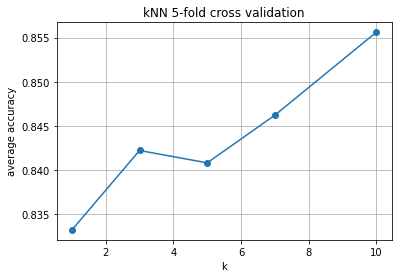

In [153]:
plt.plot(k, avg_accuracy, "-o")
plt.xlabel('k')
plt.ylabel('average accuracy')
plt.title('kNN 5-fold cross validation')
plt.grid()
plt.savefig('kNN_5fold.pdf')
plt.show()


We will now implement logistic regression from scratch for problems 3 and 5 of part 2. (Note: can change number of epochs and tune learning rate to get better performance.)

In [54]:
import copy

class LogisticRegression():
    def __init__(self):
        self.losses = []

    def fit(self, x, y, epochs):
        x = self._copy_x(x)
        y = self._copy_y(y)

        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(epochs):
            # theta^T * x + b
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias

            # map preds to [0,1] using signmoid function
            pred = self._sigmoid(x_dot_weights)

            # compute loss
            loss = self.compute_loss(y, pred)

            # compute gradients and update model accordingly
            error_w, error_b = self.compute_gradients(x, y, pred)
            self.update_params(error_w, error_b)

            # make pred
            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            self.losses.append(loss)

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy loss
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        diff =  y_pred - y_true
        grad_b = np.mean(diff)
        grad_theta = np.matmul(x.transpose(), diff)
        grad_theta = np.array([np.mean(grad) for grad in grad_theta])

        return grad_theta, grad_b

    def update_params(self, error_w, error_b):
        # can adjust learning rate (0.1)
        self.weights = self.weights - 0.1 * error_w
        self.bias = self.bias - 0.1 * error_b

    def predict(self, x):
        prob = self._sigmoid(np.matmul(x, self.weights.transpose()) + self.bias)
        return [1 if p > 0.5 else 0 for p in prob]

    def get_probabilities(self, x):
        # for ROC plotting
        prob = self._sigmoid(np.matmul(x, self.weights.transpose()) + self.bias)
        for p in prob:
            print(p)
        return prob

    def _sigmoid(self, x):
        return np.array([self._sigmoid_func(value) for value in x])

    def _sigmoid_func(self, x):
        # numerically stable version of sigmoid i.e. ensure that denominator can't be zero
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        
        else:
            z = np.exp(x)
            return z / (1 + z)

    def _copy_x(self, x):
        x = copy.deepcopy(x)
        return x.values

    def _copy_y(self, y):
        y = copy.deepcopy(y)
        return y.values.reshape(y.shape[0], 1)

In [55]:
model = LogisticRegression()
model.fit(train.iloc[:,:-1], train.iloc[:,-1], epochs=100)
preds = model.predict(test.iloc[:,:-1])
preds

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,


In [26]:
def log_reg_train(train, test, epochs):

    model = LogisticRegression()
    model.fit(train.iloc[:,:-1], train.iloc[:,-1], epochs=epochs)
    preds = model.predict(test.iloc[:,:-1])
    return preds

preds_2 = log_reg_train(train_2, test_2, epochs=100)
preds_3 = log_reg_train(train_3, test_3, epochs=100)
preds_4 = log_reg_train(train_4, test_4, epochs=100)
preds_5 = log_reg_train(train_5, test_5, epochs=100)


In [27]:
print(eval_model(preds, test))
print(eval_model(preds_2, test_2))
print(eval_model(preds_3, test_3))
print(eval_model(preds_4, test_4))
print(eval_model(preds_5, test_5))

(0.779, 0.8245614035087719, 0.5788177339901478)
(0.8, 0.8158844765342961, 0.6026666666666667)
(0.821, 0.7288732394366197, 0.6699029126213593)
(0.81, 0.7721088435374149, 0.6485714285714286)
(0.707, 0.761437908496732, 0.5143487858719646)


We now draw ROC curves for a particular train test split for kNN (k=5) and logistic regression for problem 5 of part 2.

In [47]:
model = LogisticRegression()
model.fit(train.iloc[:,:-1], train.iloc[:,-1], epochs=150)
preds = model.predict(test.iloc[:,:-1])
probs = model.get_probabilities(test.iloc[:,:-1])

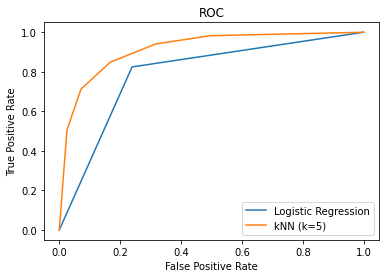

In [56]:
from sklearn import metrics

fpr_lr, tpr_lr, _ = metrics.roc_curve(test.iloc[:,-1],  probs)

five_nn = KNeighborsClassifier(n_neighbors=5)
five_nn.fit(train.iloc[:,:-1], train.iloc[:,-1])
preds_knn = five_nn.predict(test.iloc[:,:-1])
probs_knn = five_nn.predict_proba(test.iloc[:,:-1])

fpr_knn, tpr_knn, _ = metrics.roc_curve(test.iloc[:,-1],  probs_knn[:,1])

plt.plot(fpr_lr,tpr_lr, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='kNN (k=5)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend()
plt.savefig('knn_logreg_roc.pdf')
plt.show()
